<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [2]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [3]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [4]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [5]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [6]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [8]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


  CompTotalRange  Frequency
0          0-20k       1812
1      100k-200k       8177
2            1M+       3993
3      200k-500k       4055
4        20k-40k       2641
5        40k-60k       3908
6        500k-1M       2214
7        60k-80k       3943
8       80k-100k       2997


<Figure size 1000x800 with 0 Axes>

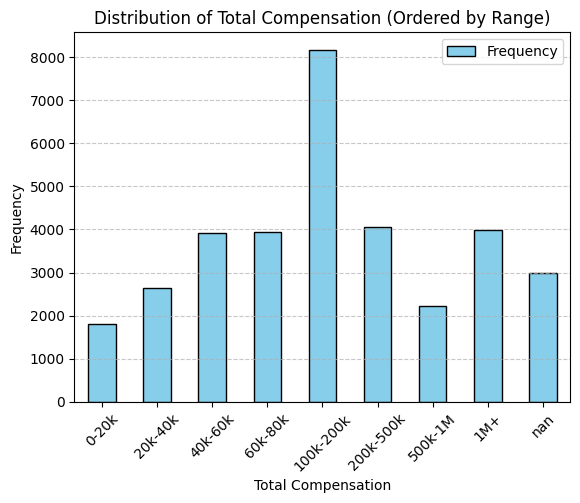

In [9]:
# Write a QUERY that fetches the CompTotal column data and filter out the NULLs while sorting values between categories and counting the frequency of all categories
QUERY = """
SELECT
    CASE
        WHEN CompTotal < 20000 THEN '0-20k'
        WHEN CompTotal >= 20000 AND CompTotal < 40000 THEN '20k-40k'
        WHEN CompTotal >= 40000 AND CompTotal < 60000 THEN '40k-60k'
        WHEN CompTotal >= 60000 AND CompTotal < 80000 THEN '60k-80k'
        WHEN CompTotal >= 80000 AND CompTotal < 100000 THEN '80k-100k'
        WHEN CompTotal >= 100000 AND CompTotal < 200000 THEN '100k-200k'
        WHEN CompTotal >= 200000 AND CompTotal < 500000 THEN '200k-500k'
        WHEN CompTotal >= 500000 AND CompTotal < 1000000 THEN '500k-1M'
        ELSE "1M+"
    END AS CompTotalRange,
    COUNT(*) AS Frequency
FROM main 
WHERE CompTotal IS NOT NULL
GROUP BY CompTotalRange
"""

# Execute the query and display the dataframe
df = pd.read_sql_query(QUERY, conn)
print(df.head(df.shape[0]))

# Order of the categories
comp_order = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100K',
              '100k-200k', '200k-500k', '500k-1M', '1M+']

# Convert to categorical with proper ordering
df["CompTotalRange"] = pd.Categorical(df["CompTotalRange"], categories=comp_order, ordered=True)

# Sort the dataframe on the correct order
df = df.sort_values("CompTotalRange")

# Create the chart
plt.figure(figsize=(10, 8))
df.plot(kind="bar", x="CompTotalRange", y="Frequency", color="skyblue", edgecolor="black")
plt.title("Distribution of Total Compensation (Ordered by Range)")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**Box Plots**

Plot a box plot of Age.


<Figure size 900x600 with 0 Axes>

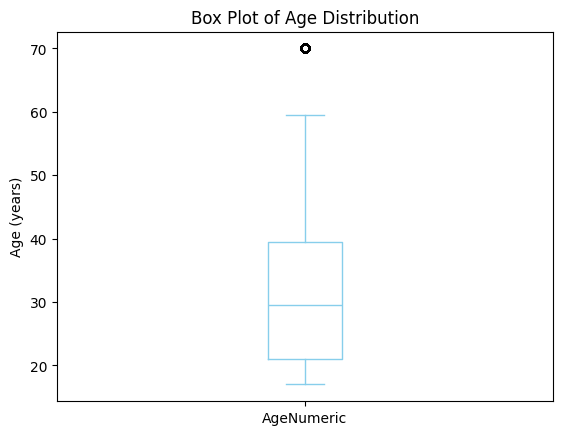

In [10]:
QUERY = """
SELECT
    CASE
        WHEN Age == "18-24 years old" THEN 21
        WHEN Age == "25-34 years old" THEN 29.5
        WHEN Age == "35-44 years old" THEN 39.5
        WHEN Age == "45-54 years old" THEN 49.5
        WHEN Age == "55-64 years old" THEN 59.5
        WHEN Age == "65 years or older" THEN 70
        WHEN Age == "Under 18 years old" THEN 17
        ELSE NULL
    END AS AgeNumeric
FROM main
WHERE Age IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)
df.value_counts().head(df.shape[0])

# Plot a box plot
plt.figure(figsize=(9, 6))
df.plot(kind="box", y="AgeNumeric", color="skyblue")

# Labels and title
plt.ylabel("Age (years)")
plt.title("Box Plot of Age Distribution")

# Show plot
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


       AgeNumeric  WorkExp
430          70.0     50.0
540          59.5     50.0
942          70.0     50.0
1175         70.0     50.0
1426         59.5     50.0
3617         70.0     50.0
4536         29.5     50.0
6337         21.0     50.0
6815         70.0     50.0
6950         29.5     50.0
9570         70.0     50.0
10150        70.0     50.0
10250        70.0     50.0
10508        70.0     50.0
10565        21.0     50.0
10739        21.0     50.0
11032        70.0     50.0
11176        59.5     50.0
11447        70.0     50.0
12577        17.0     50.0


<Figure size 1000x800 with 0 Axes>

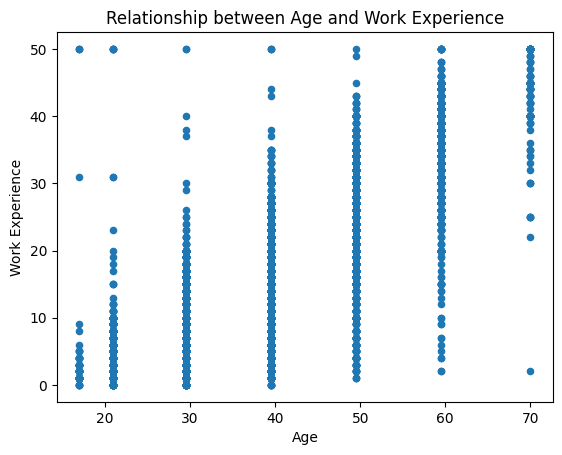

In [11]:
QUERY = """
SELECT
    CASE
        WHEN Age == "18-24 years old" THEN 21
        WHEN Age == "25-34 years old" THEN 29.5
        WHEN Age == "35-44 years old" THEN 39.5
        WHEN Age == "45-54 years old" THEN 49.5
        WHEN Age == "55-64 years old" THEN 59.5
        WHEN Age == "65 years or older" THEN 70
        WHEN Age == "Under 18 years old" THEN 17
        ELSE NULL
    END AS AgeNumeric,
    WorkExp
FROM main
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn).dropna()
print(df[df["WorkExp"] >= 50.0].head(20))

plt.figure(figsize=(10, 8))
df.plot(kind="scatter", x="AgeNumeric", y="WorkExp")
plt.title("Relationship between Age and Work Experience")
plt.xlabel("Age")
plt.ylabel("Work Experience")
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


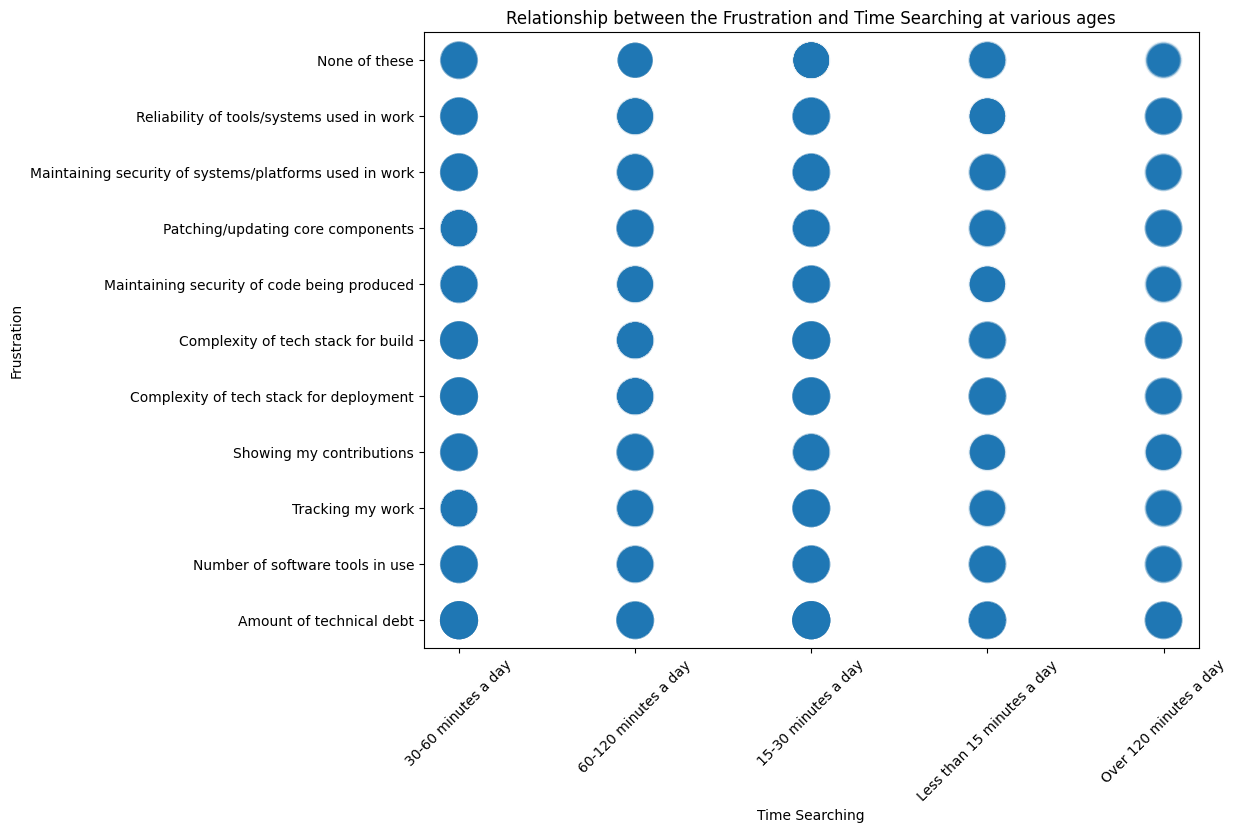

In [16]:
QUERY = """
SELECT
    CASE
        WHEN Age == "18-24 years old" THEN 21
        WHEN Age == "25-34 years old" THEN 29.5
        WHEN Age == "35-44 years old" THEN 39.5
        WHEN Age == "45-54 years old" THEN 49.5
        WHEN Age == "55-64 years old" THEN 59.5
        WHEN Age == "65 years or older" THEN 70
        WHEN Age == "Under 18 years old" THEN 17
        ELSE NULL
    END AS AgeNumeric,
    TimeSearching,
    Frustration
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND Frustration IS NOT NULL 
"""
# QUERY = """
# SELECT
#     CASE
#         WHEN Age == "18-24 years old" THEN 21
#         WHEN Age == "25-34 years old" THEN 29.5
#         WHEN Age == "35-44 years old" THEN 39.5
#         WHEN Age == "45-54 years old" THEN 49.5
#         WHEN Age == "55-64 years old" THEN 59.5
#         WHEN Age == "65 years or older" THEN 70
#         WHEN Age == "Under 18 years old" THEN 17
#         ELSE NULL
#     END AS AgeNumeric,
#     CASE
#         WHEN TimeSearching == "" THEN 
#     END AS TimeSearching_num,
#     Frustration
# FROM main
# WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND Frustration IS NOT NULL 
# """

df = pd.read_sql_query(QUERY, conn)
# print(df["Frustration"].value_counts())
# df.head()

# Séparer les frustrations multiples en lignes distinctes
df_expanded = df.assign(Frustration=df['Frustration'].str.split(';')).explode('Frustration')
df_expanded['Frustration'] = df_expanded['Frustration'].str.strip()
# print(df_expanded["Frustration"].value_counts())

# Créer un mapping catégorie -> numéro
frustration_mapping = {cat: i for i, cat in enumerate(df_expanded['Frustration'].unique())}
df_expanded['Frustration_num'] = df_expanded['Frustration'].map(frustration_mapping)
# print(df_expanded.head())

plt.figure(figsize=(10, 8))
plt.scatter(data=df_expanded, x="TimeSearching", y="Frustration_num", s=df_expanded["AgeNumeric"]*10, alpha=0.1)
plt.yticks(ticks=list(frustration_mapping.values()), labels=list(frustration_mapping.keys()))
plt.xticks(rotation=45)
plt.title("Relationship between the Frustration and Time Searching at various ages")
plt.xlabel("Time Searching")
plt.ylabel("Frustration")
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


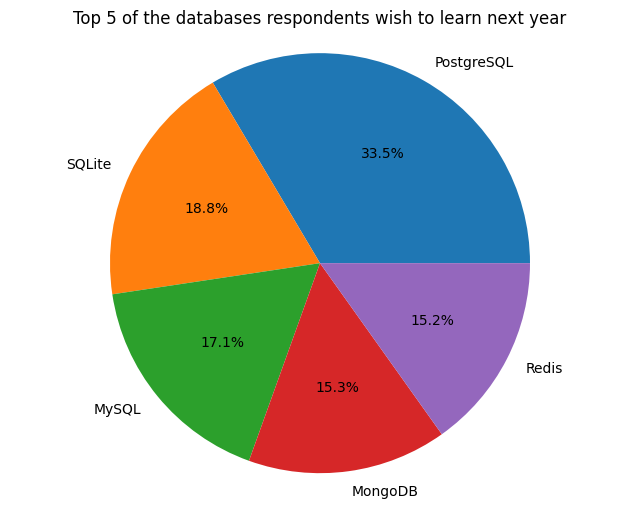

In [14]:
QUERY="""
SELECT
    DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

df_expanded = df.assign(DatabaseWantToWorkWith=df['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')
db_top_5 = df_expanded.value_counts().head().reset_index(name="Count")
# db_top_5.head()

plt.figure(figsize=(8, 6))
plt.pie(db_top_5["Count"], labels=db_top_5["DatabaseWantToWorkWith"], autopct="%1.1f%%")
plt.title("Top 5 of the databases respondents wish to learn next year")
plt.axis("equal")
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


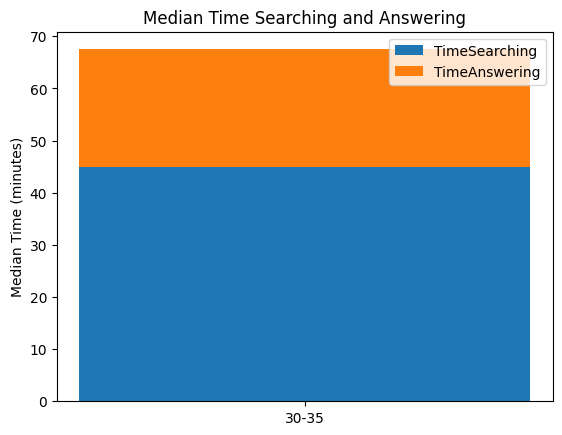

In [20]:
QUERY = """
SELECT
    Age,
    CASE
        WHEN TimeSearching == "Less than 15 minutes a day" THEN 10
        WHEN TimeSearching == "15-30 minutes a day" THEN 22.5
        WHEN TimeSearching == "30-60 minutes a day" THEN 45
        WHEN TimeSearching == "60-120 minutes a day" THEN 90
        ELSE 150
    END AS TimeSearchNum,
    CASE
        WHEN TimeAnswering == "Less than 15 minutes a day" THEN 10
        WHEN TimeAnswering == "15-30 minutes a day" THEN 22.5
        WHEN TimeAnswering == "30-60 minutes a day" THEN 45
        WHEN TimeAnswering == "60-120 minutes a day" THEN 90
        ELSE 150
    END AS TimeAnswerNum
FROM main
WHERE Age IS "25-34 years old" AND TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

median_search = df["TimeSearchNum"].median()
median_answer = df["TimeAnswerNum"].median()

plt.bar("30-35", median_search, label="TimeSearching")
plt.bar("30-35", median_answer, bottom=median_search, label="TimeAnswering")
plt.ylabel("Median Time (minutes)")
plt.title("Median Time Searching and Answering")
plt.legend()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


   AgeNumeric    median
0        49.5  130000.0
1        59.5  135000.0


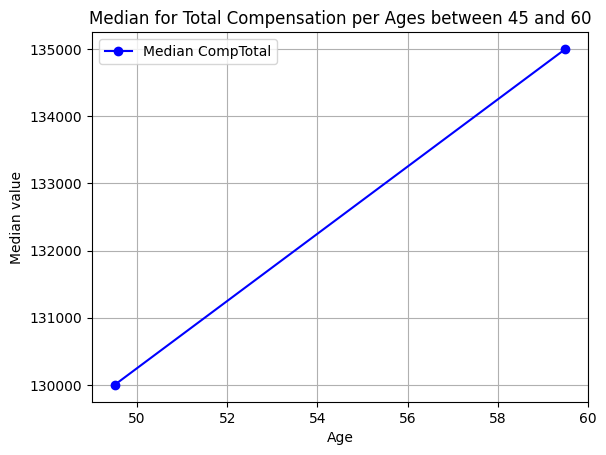

In [28]:
QUERY = """
SELECT
    CASE
        WHEN Age == "18-24 years old" THEN 21
        WHEN Age == "25-34 years old" THEN 29.5
        WHEN Age == "35-44 years old" THEN 39.5
        WHEN Age == "45-54 years old" THEN 49.5
        WHEN Age == "55-64 years old" THEN 59.5
        WHEN Age == "65 years or older" THEN 70
        WHEN Age == "Under 18 years old" THEN 17
        ELSE NULL
    END AS AgeNumeric,
    CompTotal
FROM main
WHERE AgeNumeric BETWEEN 45 AND 60 AND CompTotal IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

median = df.groupby("AgeNumeric")["CompTotal"].median().reset_index(name="median")
print(median)

ages = list(range(45, 61))

plt.plot(median["AgeNumeric"], median["median"], marker='o', linestyle='-', color='b', label='Median CompTotal')
plt.title('Median for Total Compensation per Ages between 45 and 60')
plt.xlabel('Age')
plt.ylabel('Median value')
plt.legend()
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


MainBranch                                                                           
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64


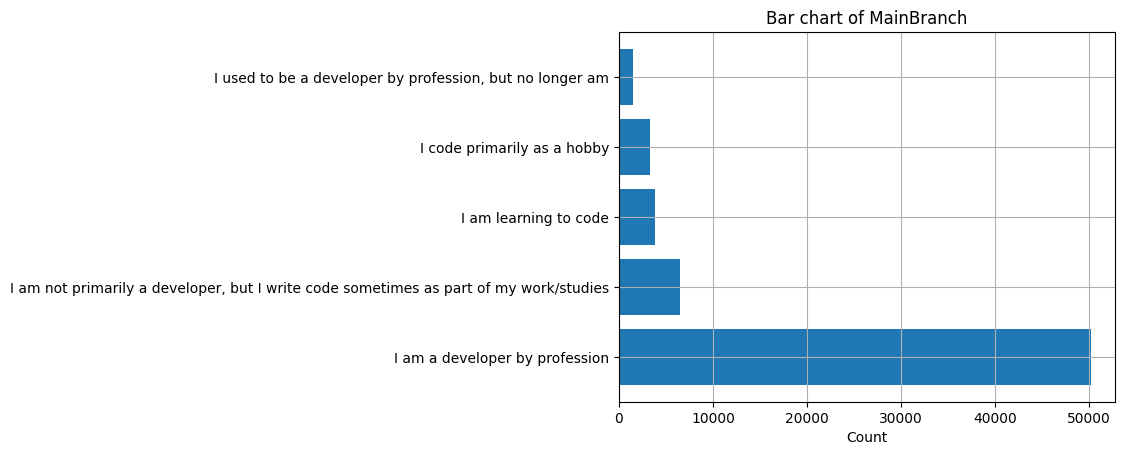

In [40]:
QUERY = """
SELECT
    MainBranch
FROM main
WHERE MainBranch IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)
print(df.value_counts())
# df.head()

data = df.value_counts().reset_index(name="Counts").set_index("MainBranch")
# data.head()

plt.barh(y=data.index, width=data['Counts'])
plt.title("Bar chart of MainBranch")
plt.xlabel("Count")
plt.grid(True)
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [41]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
